## Making Plots With plotnine

Python has powerful built-in plotting capabilities such as matplotlib, but for this episode, we will be using the plotnine package, which facilitates the creation of highly-informative plots of structured data based on the R implementation of ggplot2 and The Grammar of Graphics by Leland Wilkinson. The plotnine package is built on top of Matplotlib and interacts well with Pandas.


Just as with the other packages, plotnine needs to be imported. It is good practice to not just load an entire package such as from plotnine import *, but to use an abbreviation as we used pd for Pandas:

plotnine is not included in the standard Anaconda installation and needs to be installed separately.

In [11]:
!conda install -y -c conda-forge plotnine

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.5.2
  latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.5.1




This will then install the latest version of plotnine into your conda environment.

In [12]:
%matplotlib inline
import plotnine as p9

From now on, the functions of plotnine are available using p9.. For the exercise, we will use the surveys.csv data set, with the NA values removed

In [13]:
import pandas as pd

surveys_complete = pd.read_csv('../Files/surveys.csv')
surveys_complete = surveys_complete.dropna()

### Plotting with plotnine


The plotnine package (cfr. other packages conform The Grammar of Graphics) supports the creation of complex plots from data in a dataframe. It uses default settings, which help creating publication quality plots with a minimal amount of settings and tweaking.

plotnine graphics are built step by step by adding new elements adding different elements on top of each other using the + operator. Putting the individual steps together in brackets () provides Python-compatible syntax.

To build a plotnine graphic we need to:

Bind the plot to a specific data frame using the data argument:

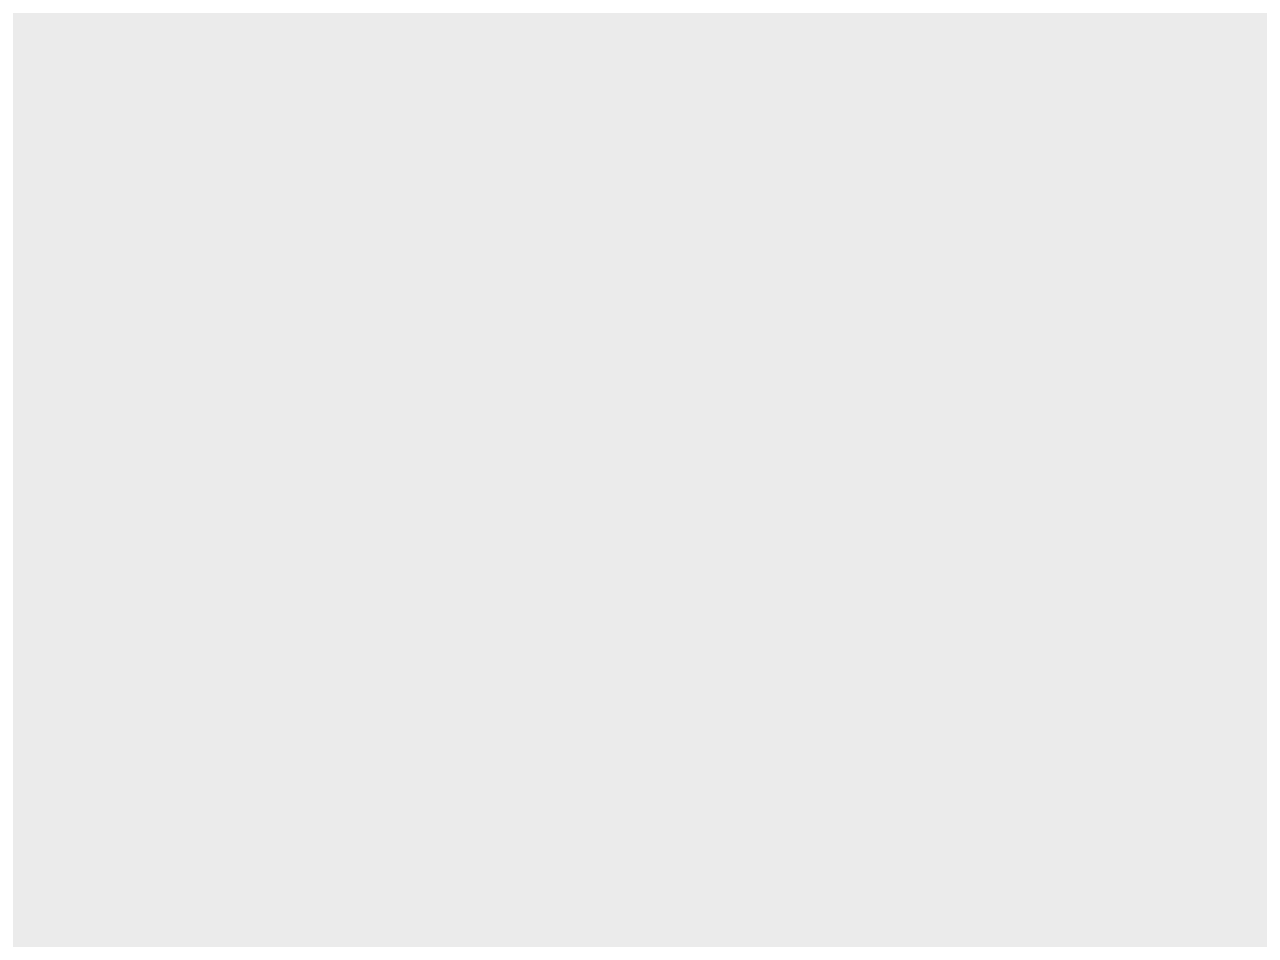

In [14]:
(p9.ggplot(data=surveys_complete))

As we have not defined anything else, just an empty figure is available and presented.

Define aesthetics (aes), by selecting variables used in the plot and mapping them to a presentation such as plotting size, shape, color, etc. You can interpret this as: which of the variables will influence the plotted objects/geometries:

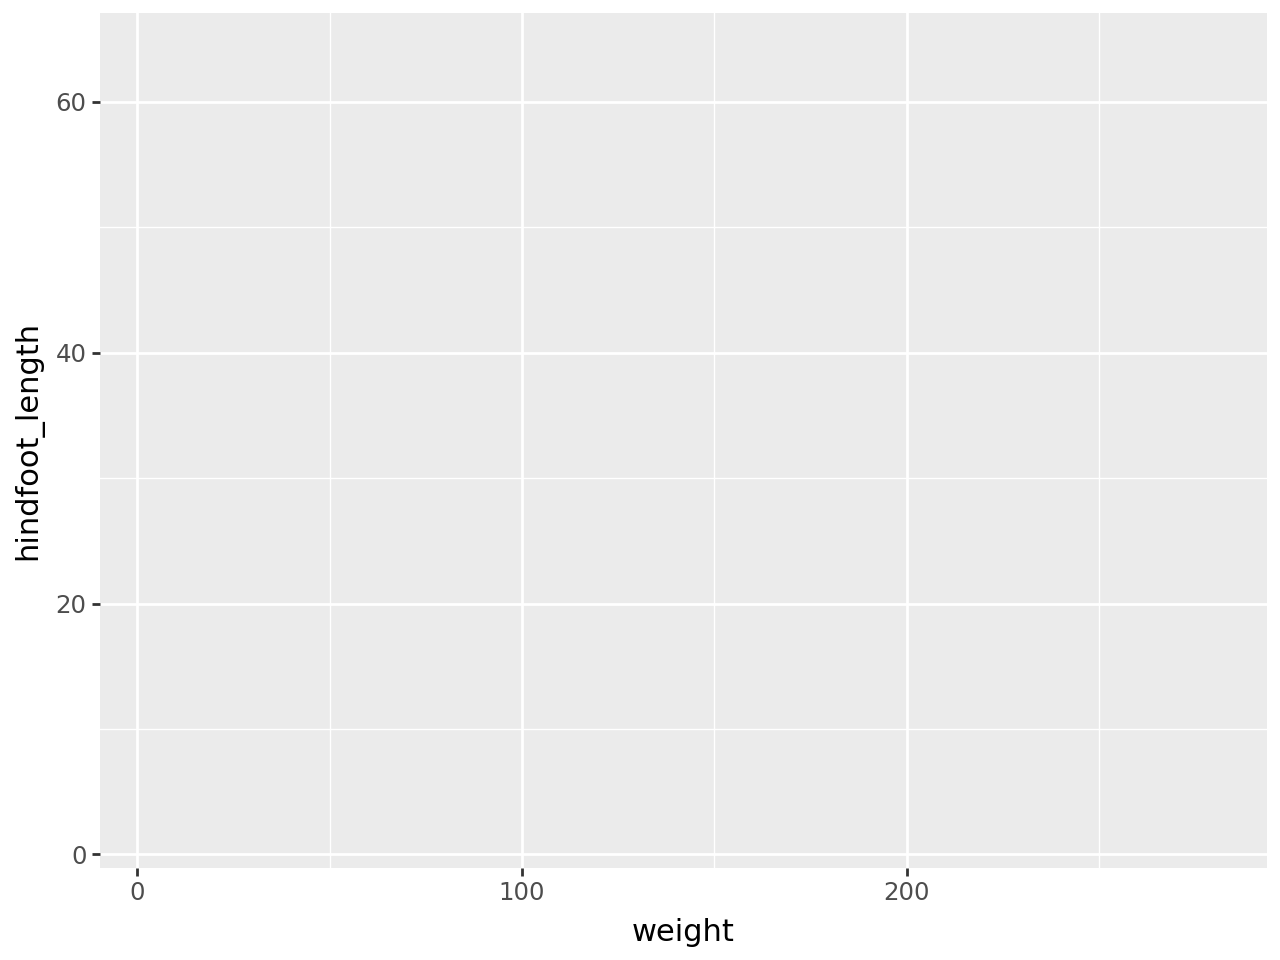

In [15]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length')))

The most important aes mappings are: x, y, alpha, color, colour, fill, linetype, shape, size and stroke.

Still no specific data is plotted, as we have to define what kind of geometry will be used for the plot. The most straightforward is probably using points. Points is one of the geoms options, the graphical representation of the data in the plot. Others are lines, bars,… To add a geom to the plot use + operator:

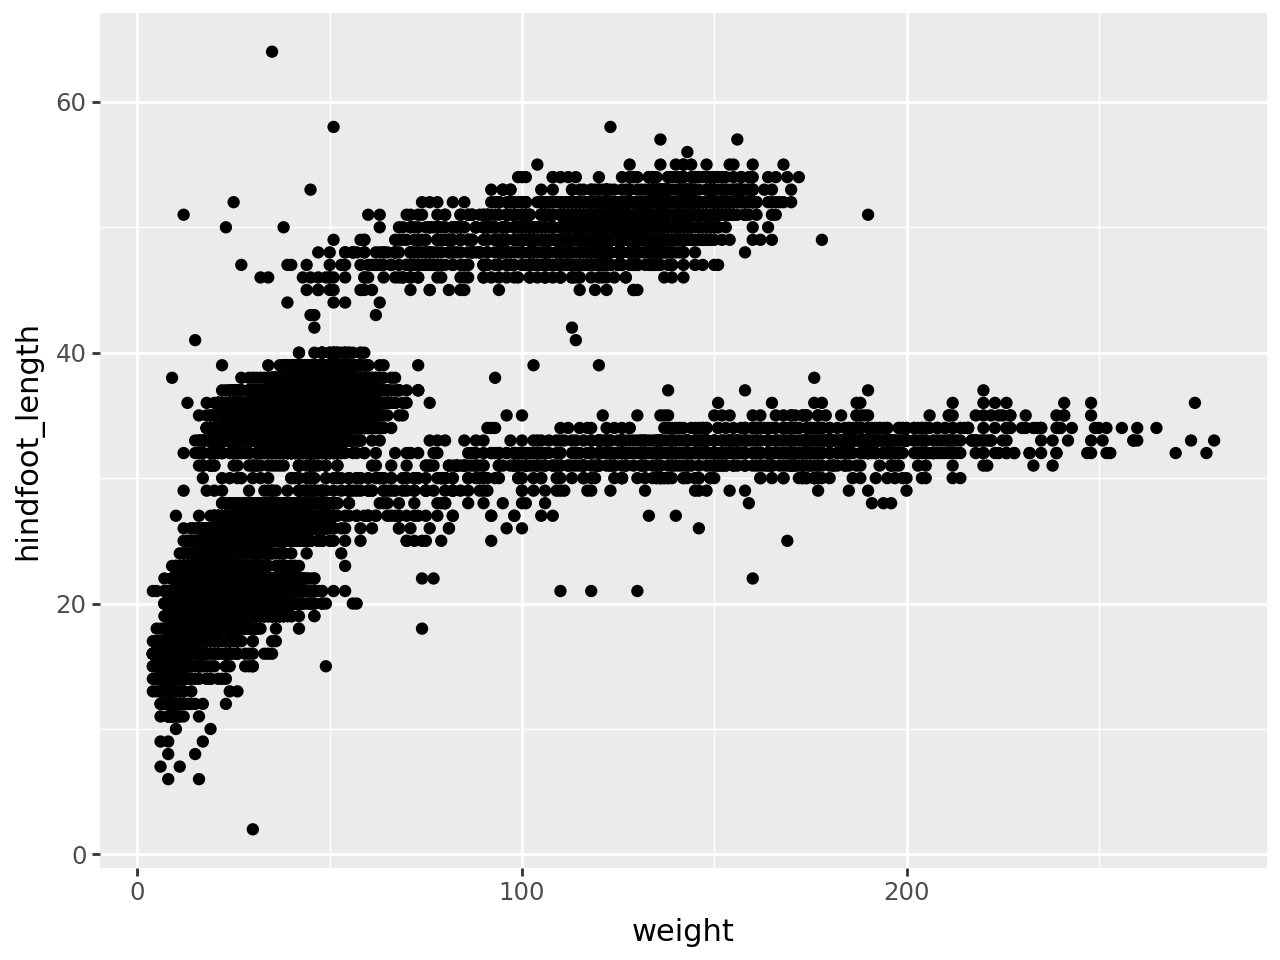

In [16]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point()
)

The + in the plotnine package is particularly useful because it allows you to modify existing plotnine objects. This means you can easily set up plot templates and conveniently explore different types of plots, so the above plot can also be generated with code like this:

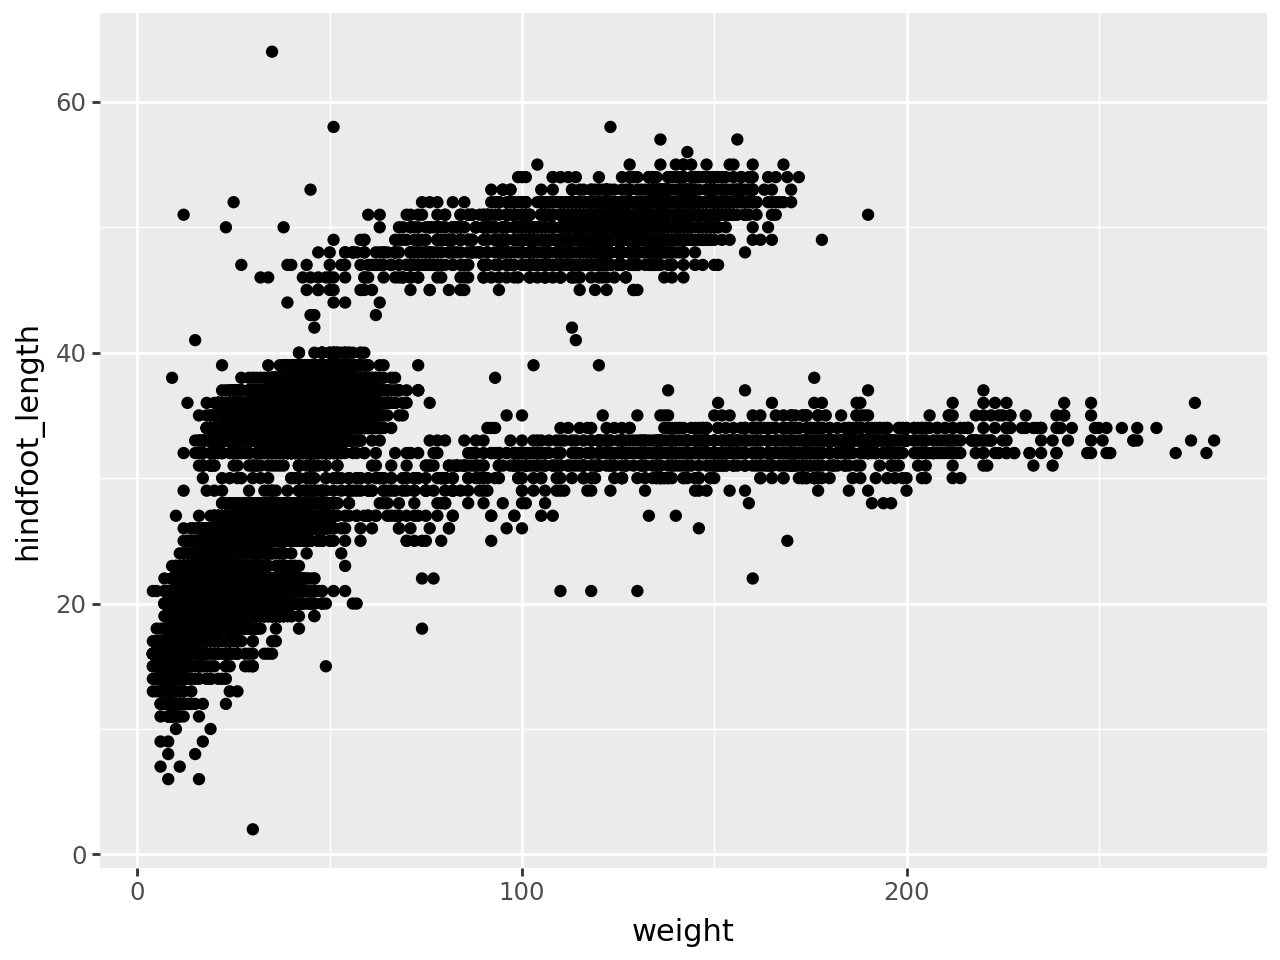

In [17]:
# Create
surveys_plot = p9.ggplot(data=surveys_complete,
                         mapping=p9.aes(x='weight', y='hindfoot_length'))

# Draw the plot
surveys_plot + p9.geom_point()

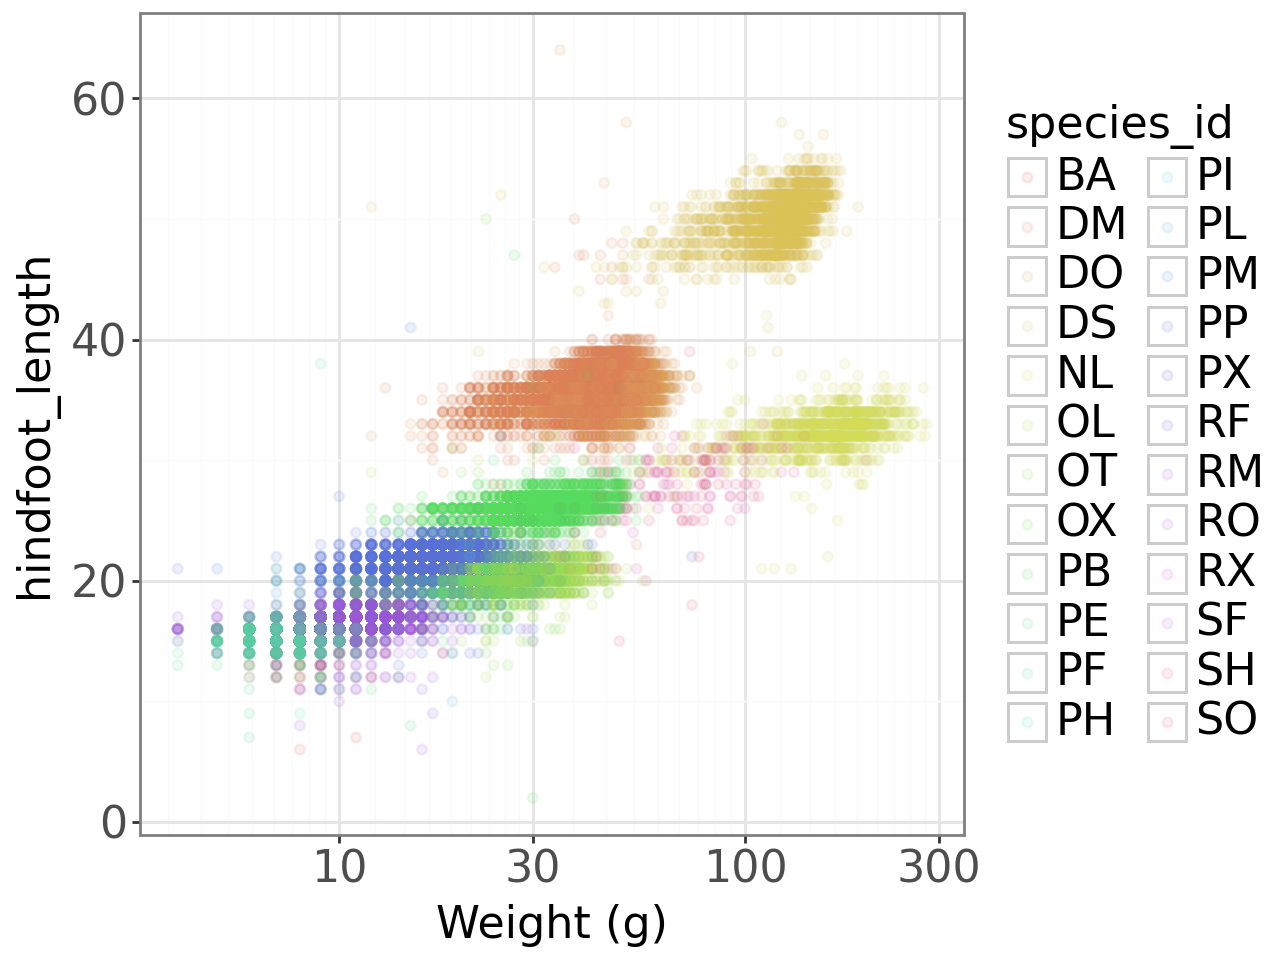

In [18]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("Weight (g)")
    + p9.scale_x_log10()
    + p9.theme_bw()
    + p9.theme(text=p9.element_text(size=16))
)

## Plotting distributions

Visualizing distributions is a common task during data exploration and analysis. To visualize the distribution of weight within each species_id group, a boxplot can be used:

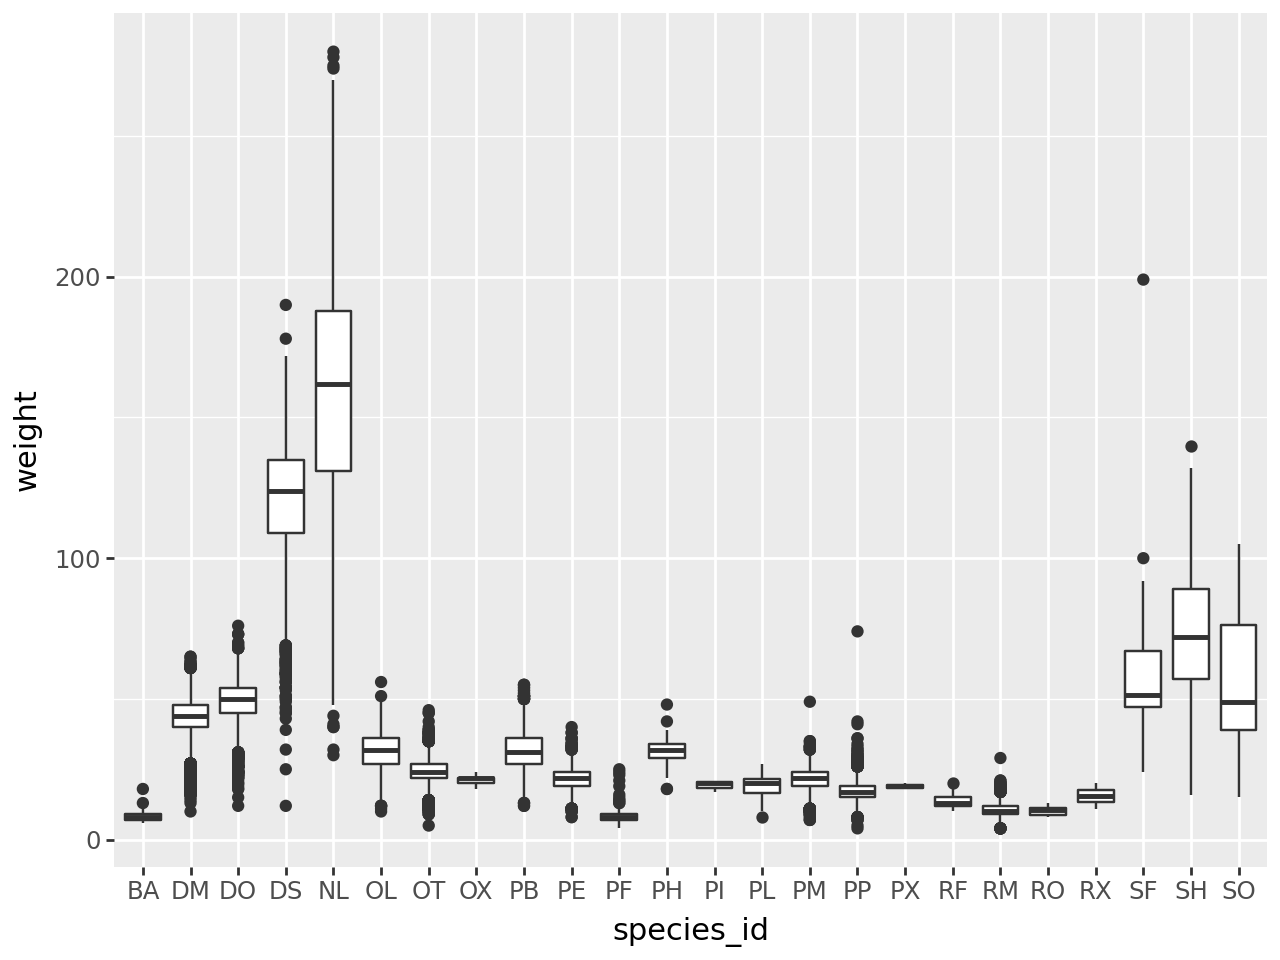

In [19]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight'))
    + p9.geom_boxplot()
)

## Plotting time series data

Let’s calculate the number of counts per year for each species. To do that we need to group data first and count the species (species_id) within each group.

In [20]:
yearly_counts = surveys_complete.groupby(['year', 'species_id'])['species_id'].count()
yearly_counts

year  species_id
1977  DM            181
      DO             12
      DS             29
      OL              1
      OX              2
                   ... 
2002  PP            375
      RM             20
      RO              7
      SF              5
      SH              9
Name: species_id, Length: 332, dtype: int64

When checking the result of the previous calculation, we actually have both the year and the species_id as a row index. We can reset this index to use both as column variable:

In [21]:
yearly_counts = yearly_counts.reset_index(name='counts')
yearly_counts

,year,species_id,counts
0,1977,DM,181
1,1977,DO,12
2,1977,DS,29
3,1977,OL,1
4,1977,OX,2
...,...,...,...
327,2002,PP,375
328,2002,RM,20
329,2002,RO,7
330,2002,SF,5


Timelapse data can be visualised as a line plot (geom_line) with years on x axis and counts on the y axis.

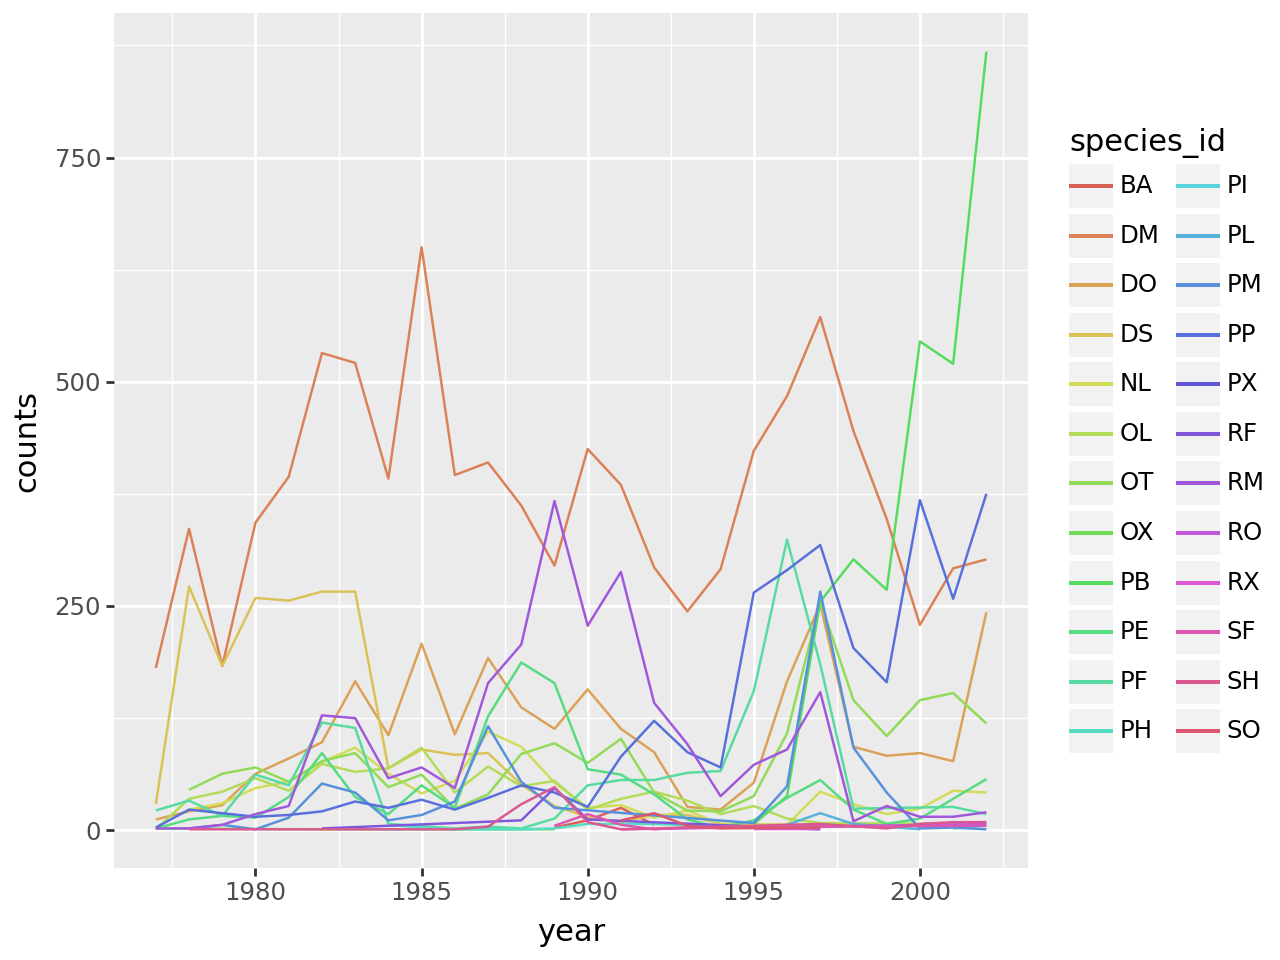

In [22]:
(p9.ggplot(data=yearly_counts,
           mapping=p9.aes(x='year',
                          y='counts',
                          color='species_id'))
    + p9.geom_line()
)

## Faceting

As any other library supporting the Grammar of Graphics, plotnine has a special technique called faceting that allows to split one plot into multiple plots based on a factor variable included in the dataset.

Consider our scatter plot of the weight versus the hindfoot_length from the previous sections:

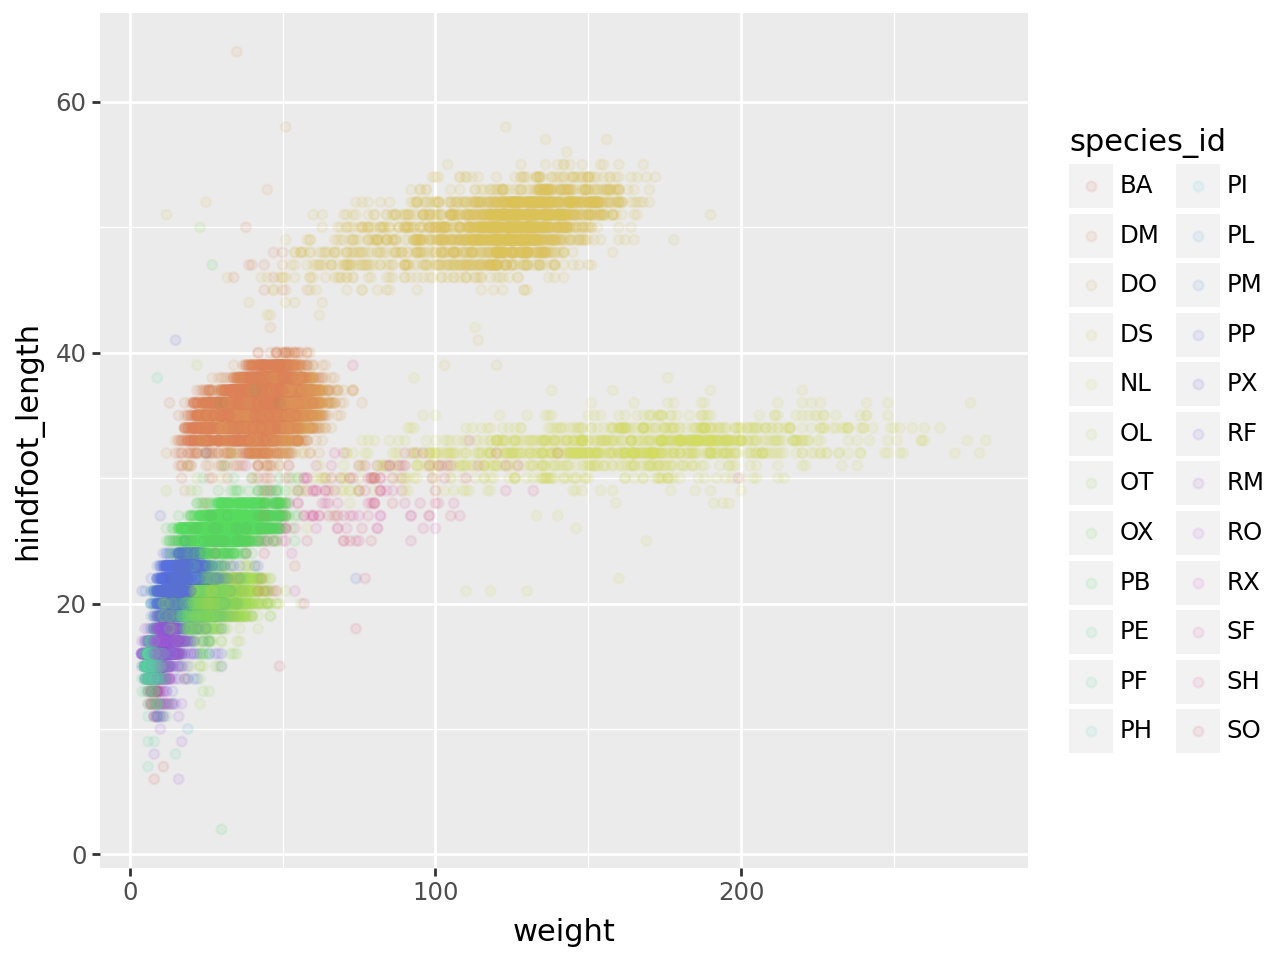

In [23]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
)

We can now keep the same code and at the facet_wrap on a chosen variable to split out the graph and make a separate graph for each of the groups in that variable. As an example, use sex:

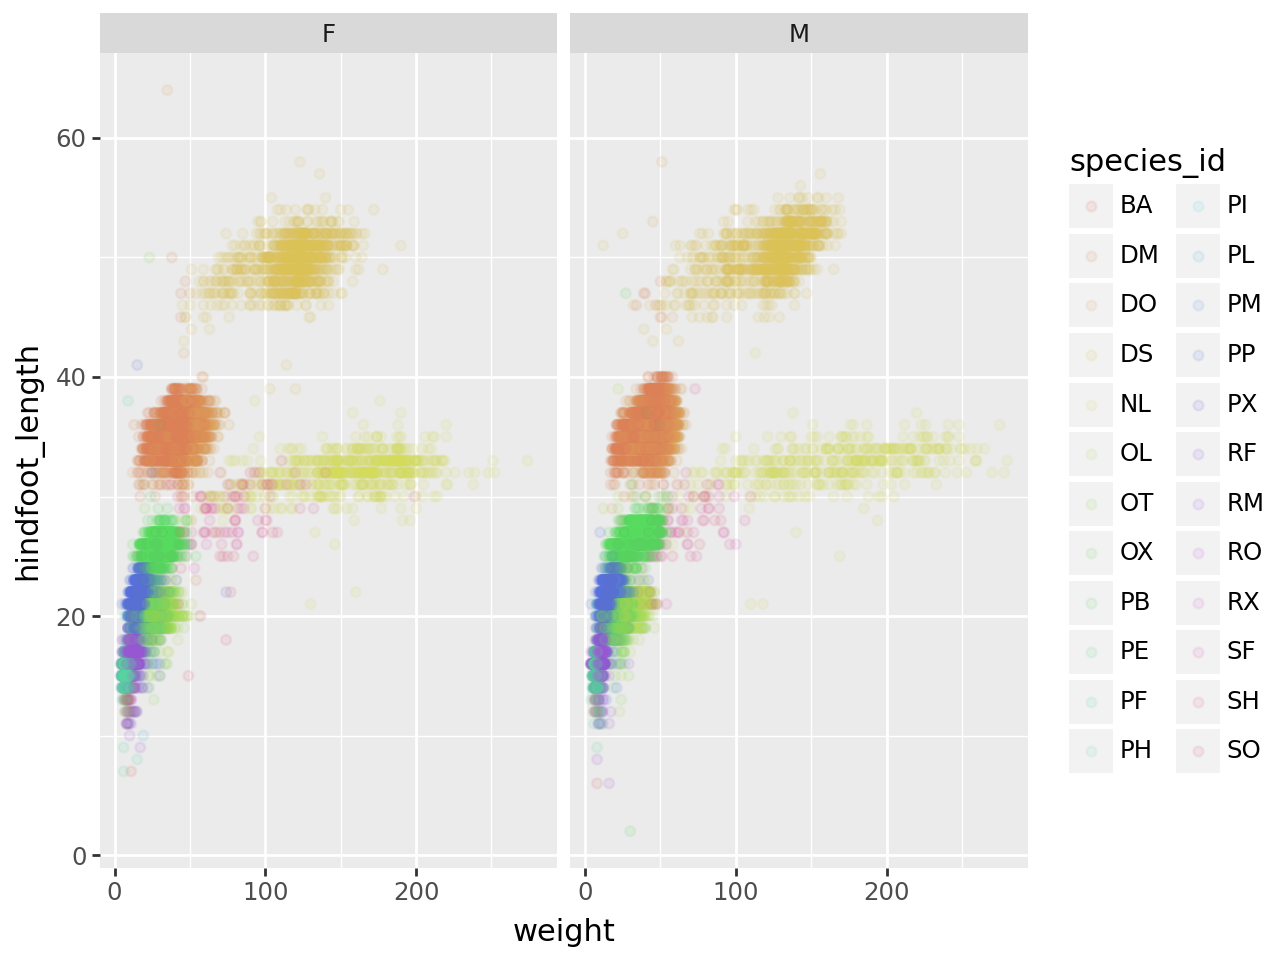

In [24]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap("sex")
)

We can apply the same concept on any of the available categorical variables:

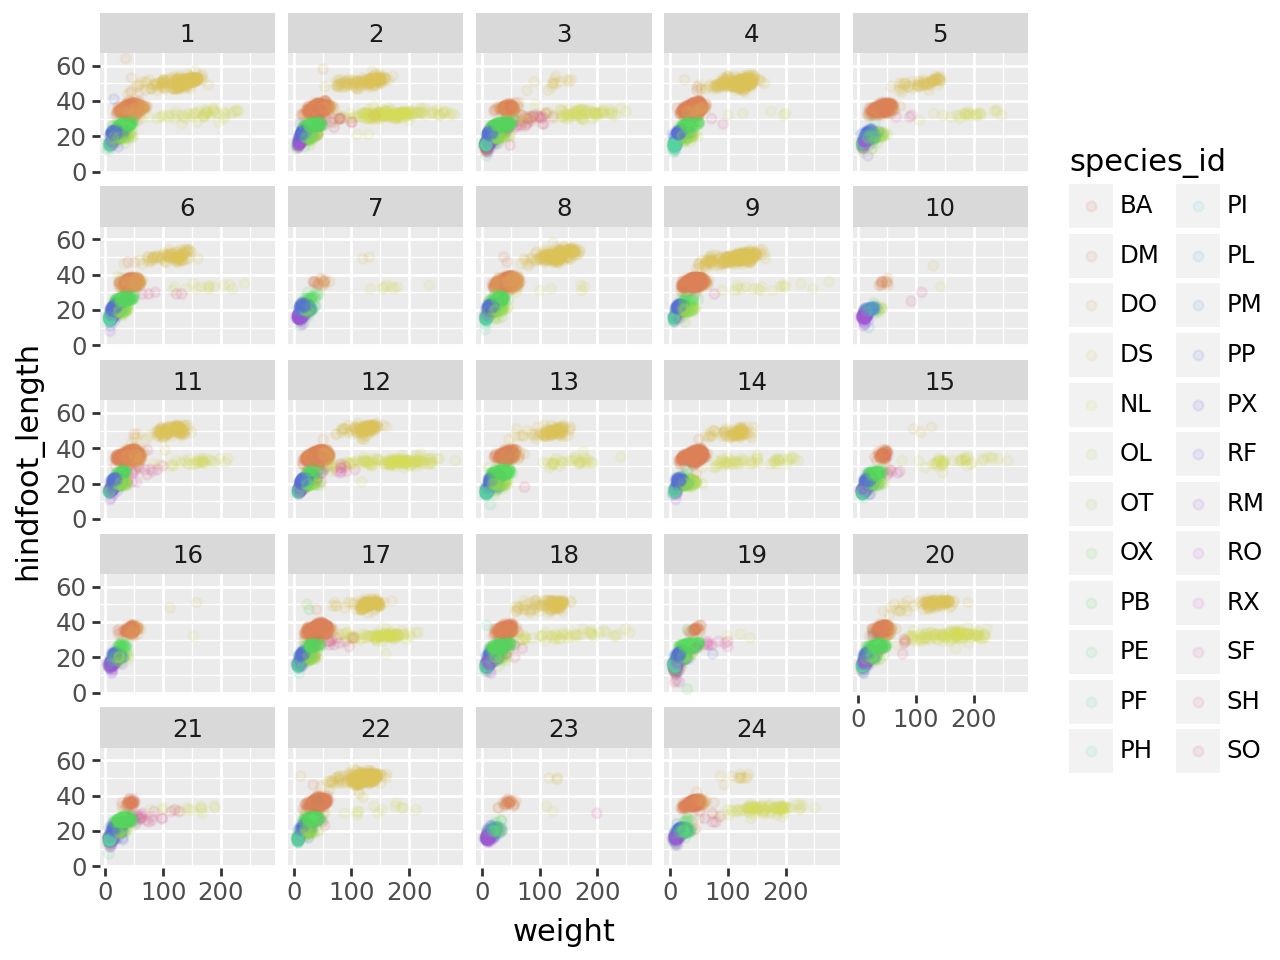

In [25]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap("plot_id")
)

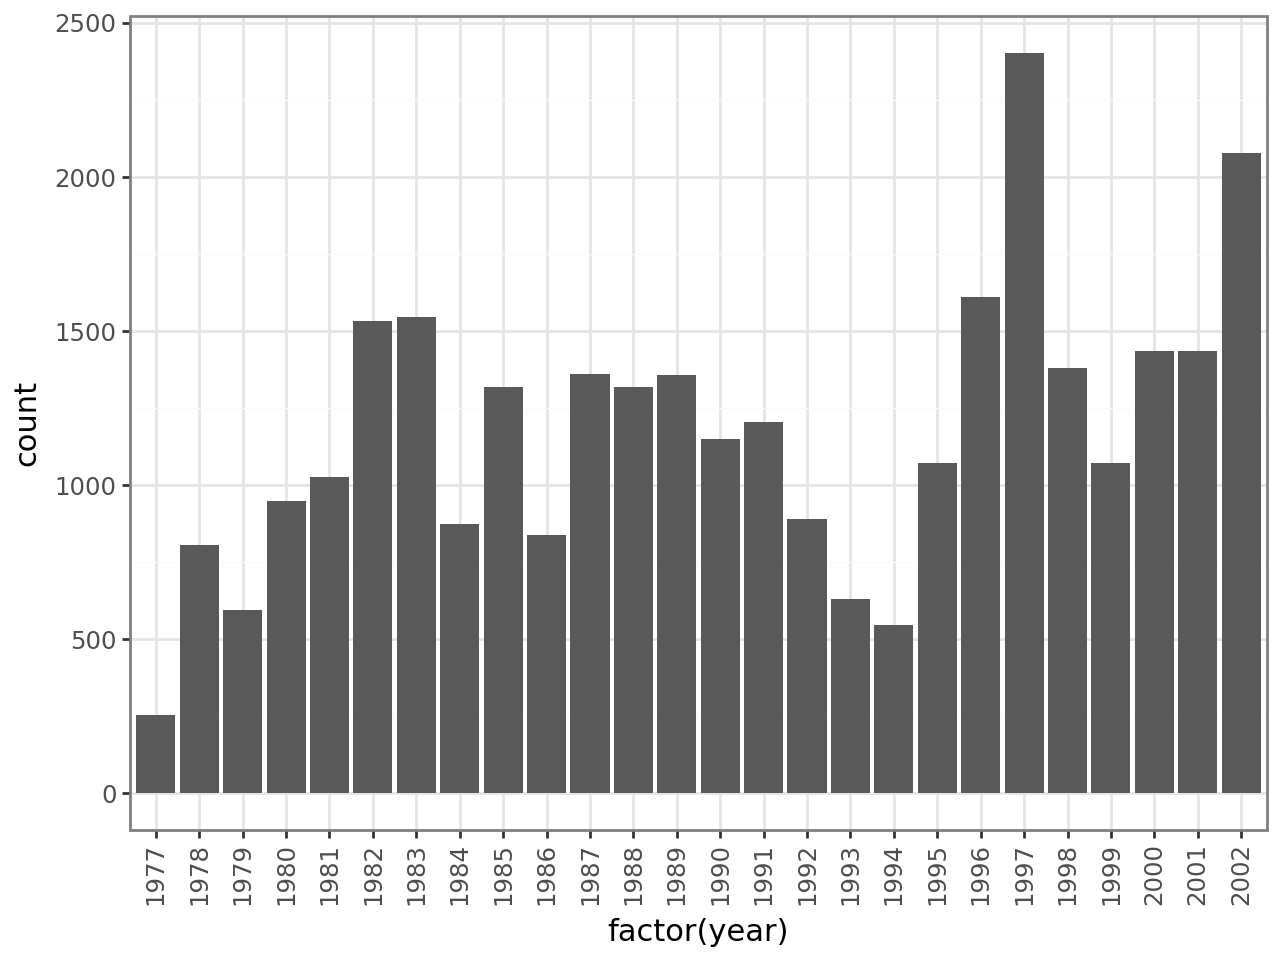

In [26]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)